 # Superstore Sales Analysis

# Objective
- What is the overall sales trend?
- Which are the Top 10 products by sales?
- Which are the Most Selling Products?
- Which is the most preferred Ship Mode?
- Which are the Most Profitable Category and Sub_Category?

In [31]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
# Importing Data File
df = pd.read_excel('superstore_sales.xlsx')


In [7]:
df.shape

(51290, 21)

In [118]:
# Fist five rows
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sales,quantity,discount,profit,shipping_cost,order_priority,year,month_year,month-year,year-month
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,408.300,2,0.0,106.140,35.46,Medium,2011,2011-01,2011-01,2011-01
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,120.366,3,0.1,36.036,9.72,Medium,2011,2011-01,2011-01,2011-01
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,66.120,4,0.0,29.640,8.17,High,2011,2011-01,2011-01,2011-01
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,44.865,3,0.5,-26.055,4.82,High,2011,2011-01,2011-01,2011-01
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,113.670,5,0.1,37.770,4.70,Medium,2011,2011-01,2011-01,2011-01


In [122]:
# Last five rows
df.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sales,quantity,discount,profit,shipping_cost,order_priority,year,month_year,month-year,year-month
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,13.904,2,0.2,4.5188,0.890,Medium,2014,2014-12,2014-12,2014-12
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,3.990,1,0.0,0.4200,0.490,Medium,2014,2014-12,2014-12,2014-12
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,26.400,3,0.0,12.3600,0.350,Medium,2014,2014-12,2014-12,2014-12
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,7.120,1,0.0,0.5600,0.199,Medium,2014,2014-12,2014-12,2014-12
51289,CA-2014-156720,2014-12-31,2015-01-04,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,3.024,3,0.2,-0.6048,0.170,Medium,2014,2014-12,2014-12,2014-12


In [123]:
# Columns in dataset
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year',
       'month_year', 'month-year', 'year-month'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [18]:
# checkig is there any null values
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [20]:
# Knowing descriptive statistics
df.describe()

,order_date,ship_date,sales,quantity,discount,profit,shipping_cost,year
count,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,2013-05-11 21:26:49.155780864,2013-05-15 20:42:42.745174528,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
min,2011-01-01 00:00:00,2011-01-03 00:00:00,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,2012-06-19 00:00:00,2012-06-23 00:00:00,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,2013-07-08 00:00:00,2013-07-12 00:00:00,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,2014-05-22 00:00:00,2014-05-26 00:00:00,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,2014-12-31 00:00:00,2015-01-07 00:00:00,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000
std,NaN,NaN,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931


# Exploratory Data Analysis

1. What is overall sales trend?

In [29]:
df['order_date'].min()

Timestamp('2011-01-01 00:00:00')

In [43]:
df['order_date'].max()

Timestamp('2014-12-31 00:00:00')

In [57]:
# Getting month and year
df['year-month'] = df['order_date'].dt.strftime('%Y-%m')

In [58]:
# Grouping by month year
df_trend = df[['year-month','sales']].groupby(by='year-month').sum().reset_index()

In [68]:
df_trend.head()

,year-month,sales
0,2011-01,98898.48886
1,2011-02,91152.15698
2,2011-03,145729.36736
3,2011-04,116915.76418
4,2011-05,146747.83610


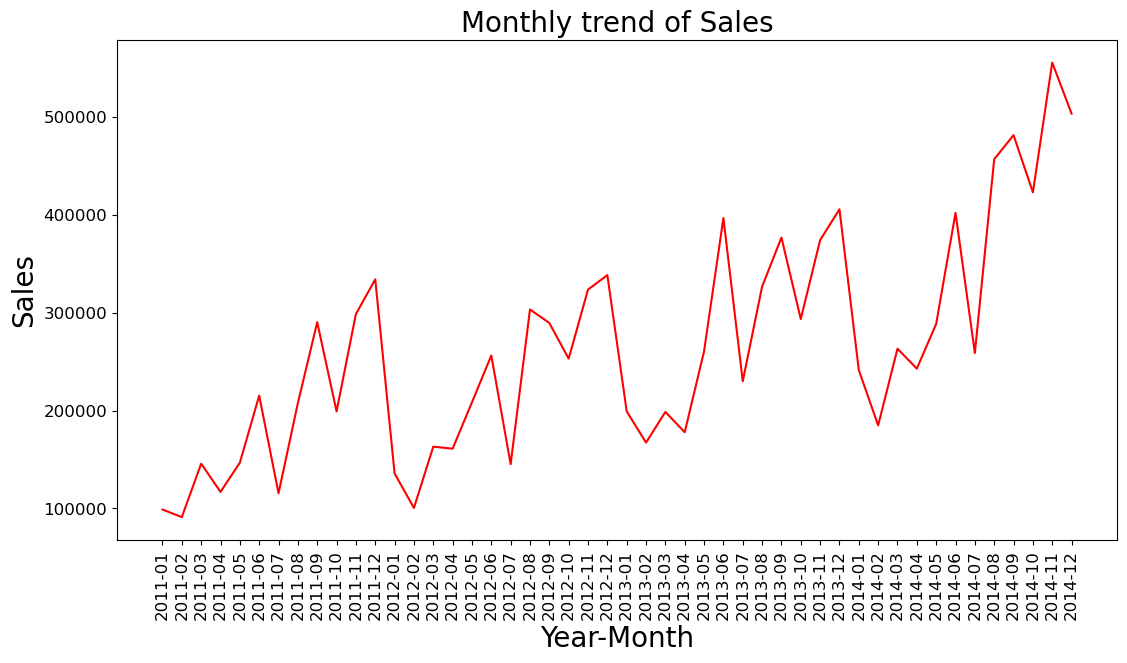

In [67]:
# Plotiing line graph for overall sales trend
fig = plt.figure(figsize=(10,5))
axes = fig.add_axes(rect=[0,0,1,1])

axes.plot('year-month','sales',data=df_trend,color='red')
axes.set_title('Monthly trend of Sales',fontsize=20)
axes.set_xlabel('Year-Month',fontsize=20)
axes.set_ylabel('Sales',fontsize=20)

plt.xticks(rotation='vertical',fontsize=12)
plt.yticks(fontsize=12)

plt.show()



2. Which are the Top 10 products by sales?

In [78]:
# Grouping by product_name
Top_products = df[['product_name','sales']].groupby('product_name').sum()

In [79]:
# Sorting for top products
Top_products = Top_products.sort_values('sales',ascending=False)

In [80]:
# Top 10 products by sales
Top_products.head(10)

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


3. Which are the Most Selling Products?

In [81]:
# Grouping by product_name
most_sell_products = df[['product_name','quantity']].groupby('product_name').sum()

In [82]:
# Sorting for most selling products
most_sell_products = most_sell_products.sort_values('quantity',ascending=False)

In [83]:
# Top 10 or most selling products
most_sell_products.head(10)

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


- Staples are most selling product.

4. Which is the most preferred Ship Mode?

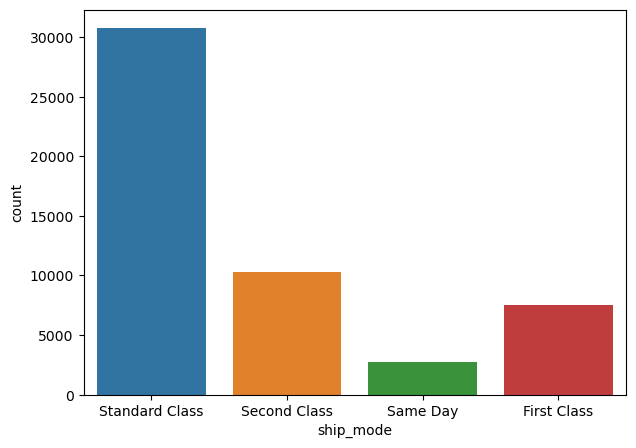

In [117]:
# Using count plot from sns library so can get count of each ship mode
fig = plt.figure(figsize=(7,5))

sns.countplot(x=df['ship_mode'])

plt.show()

- standard class is most preferred ship mode.

5. Which are the Most Profitable Category and Sub_Category?

In [84]:
# Group by Category & Sub_category
most_profitable_cat_subcat = df[['category','sub_category','profit']].groupby(['category','sub_category']).sum()

In [86]:
# Sorting by category & profit
most_profitable_cat_subcat = most_profitable_cat_subcat.sort_values(['category','profit'],ascending=False)

In [88]:
# Most profitable Category & Sub_category
most_profitable_cat_subcat

profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870